In [1]:
import pandas as pd
import scipy
import numpy as np
import scipy.sparse as sp
import scipy.io as spio

from scipy.stats import pearsonr

import operator
import matplotlib.pyplot as plt

import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib as mpl
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch, Rectangle
from matplotlib.font_manager import FontProperties
from matplotlib import gridspec
from matplotlib.ticker import FormatStrFormatter
from sklearn.metrics import roc_auc_score

import seaborn as sns
import matplotlib.collections as collections

import isolearn.io as isoio

from analyze_aparent_designed_mpra_helpers import *


<h2>Load collapsed designed MPRA data</h2>

In [2]:
#Load designed MPRA data (Collapsed over experiment replicates)
seq_dict = isoio.load('../data/prepared_data/apa_array_data/apa_array_data_master_seq')
print("n = " + str(len(seq_dict['array_df'])))
print('Avg read count (avg over barcodes) = ' + str(np.mean(seq_dict['array_df'].query("n_barcodes >= 2")['mean_total_count'])))
print('Pooled read count (pooled over barcodes) = ' + str(np.mean(seq_dict['array_df'].query("n_barcodes >= 2")['pooled_total_count'])))

#Load variant dataframe
variant_dict = isoio.load('../data/prepared_data/apa_variant_data/apa_variant_data_master_seq')
print("n (variants) = " + str(len(variant_dict['variant_df'])))

#Load predictions
model_name = 'aparent_theano_legacy_30_31_34_pasaligned'
pred_dict = isoio.load('predictions/apa_array_data_legacy/' + model_name + '_predictions_master_seq')

#Join mpra dataframes with prediction table and calculate cut probabilities
seq_df, variant_df = append_predictions(seq_dict['array_df'], seq_dict['pooled_cuts'], variant_dict['variant_df'], variant_dict['pooled_cuts_var'], variant_dict['pooled_cuts_ref'], pred_dict['array_df'], pred_dict['cut_prob'])


n = 39833
Avg read count (avg over barcodes) = 431.92676310713546
Pooled read count (pooled over barcodes) = 3656.5562880452626
n (variants) = 21734


<h2>Saturation Mutagenesis of Disease-Implicated PASs </h2>

In [3]:
variant_df_filtered = variant_df.query("n_barcodes_var >= 5 and n_barcodes_ref >= 5 and mean_total_count_var >= 200 and mean_total_count_ref >= 200")

#Filter on human variants
included_experiments = ['acmg_apadb', 'acmg_polyadb', 'sensitive_genes', 'clinvar_wt', 'human_variant']

filter_query = ""

for exp_index, included_experiment in enumerate(included_experiments) :
    filter_query += "experiment == '" + str(included_experiment) + "'"
    if exp_index < len(included_experiments) - 1 :
        filter_query += " or "

human_variant_df = variant_df.query(filter_query).copy()
human_variant_df_filtered = variant_df_filtered.query(filter_query).copy()

human_variant_df['delta_logodds_pred'] = human_variant_df['mean_delta_logodds_pred']
human_variant_df_filtered['delta_logodds_pred'] = human_variant_df_filtered['mean_delta_logodds_pred']


UTR = F2.1
# Clinvar IDs = 
NM_000506.4(F2):c.*97G>A 1.37 (1.38)
c.*106T>A 1.41 (1.04)
c.*108C>T 2.08 (1.08)
c.*96C>T 1.17 (1.03)
NM_000506.4(F2):c.*44G>T 1.57 (1.08)
# Variants = 272 (254)
# R^2 = 0.72 (0.28)

Significance filter = p < 0.001, delta > 0.693
# Significant variants = 35 (18)
# % Significant = 12.867647058823529 (7.086614173228346)
# Significant? AUC = 0.879 (0.771)
# Direction? AUC = 0.976 (0.925)
# Direction? Accuracy = 0.943 (0.889)

Observed:


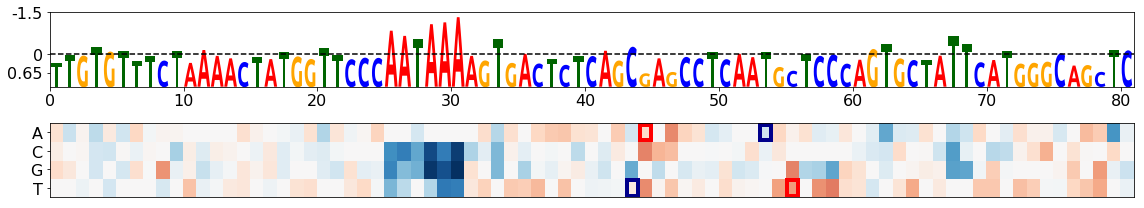

Predicted:


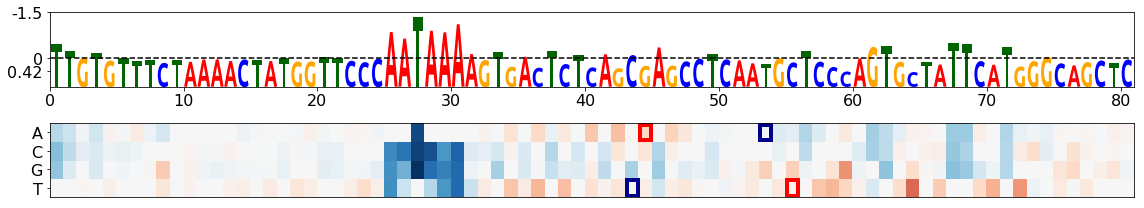

UTR = FOXP3.1
# Clinvar IDs = 
MANUAL_FOXP3_IPEX 10.14 (17.64)
# Variants = 27 (23)
# R^2 = 0.82 (0.2)

Significance filter = p < 0.001, delta > 0.693
# Significant variants = 3 (0)
# % Significant = 11.11111111111111 (0.0)
# Significant? AUC = 1.0 (nan)
# Direction? AUC = nan (nan)
# Direction? Accuracy = 1.0 (nan)

Observed:


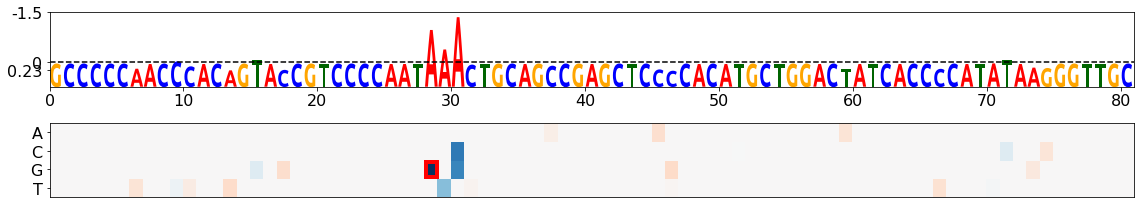

Predicted:


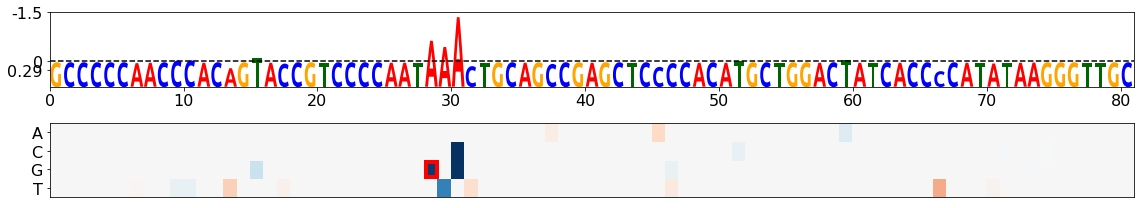

UTR = TP53.3
# Clinvar IDs = 
NM_000546.5(TP53):c.*1160T>G 1.09 (1.09)
NM_001126113.2(TP53):c.*1422G>C 1.13 (1.13)
NM_000546.5(TP53):c.*1175A>C 18.59 (23.18)
# Variants = 270 (252)
# R^2 = 0.86 (0.46)

Significance filter = p < 0.001, delta > 0.693
# Significant variants = 33 (15)
# % Significant = 12.222222222222221 (5.9523809523809526)
# Significant? AUC = 0.963 (0.918)
# Direction? AUC = 1.0 (1.0)
# Direction? Accuracy = 0.97 (0.933)

Observed:


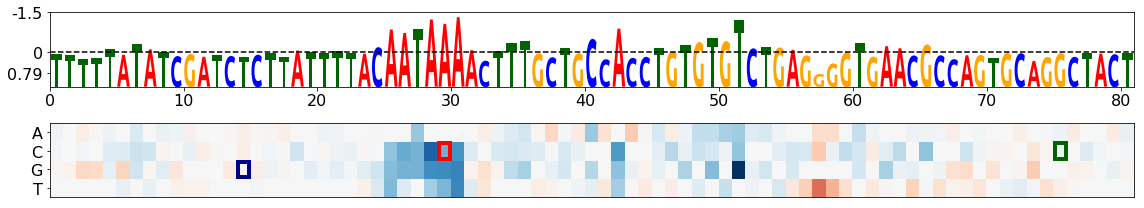

Predicted:


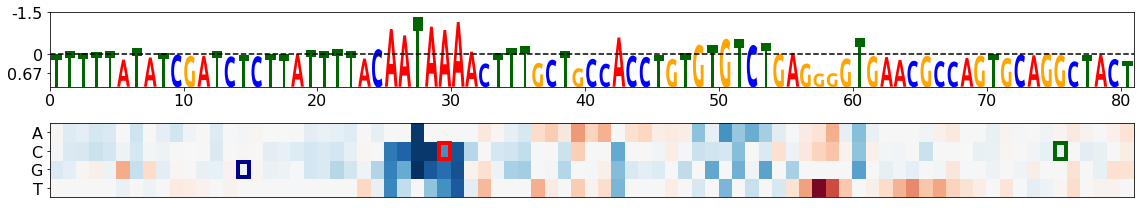

UTR = INS.1
# Clinvar IDs = 
NM_000207.2(INS):c.*28G>A 1.41 (1.19)
NM_000207.2(INS):c.*59A>G 42.46 (58.75)
NM_000207.2(INS):c.*42C>T 1.5 (1.19)
# Variants = 259 (241)
# R^2 = 0.76 (0.62)

Significance filter = p < 0.001, delta > 0.693
# Significant variants = 35 (18)
# % Significant = 13.513513513513514 (7.468879668049793)
# Significant? AUC = 0.955 (0.921)
# Direction? AUC = 1.0 (1.0)
# Direction? Accuracy = 1.0 (1.0)

Observed:


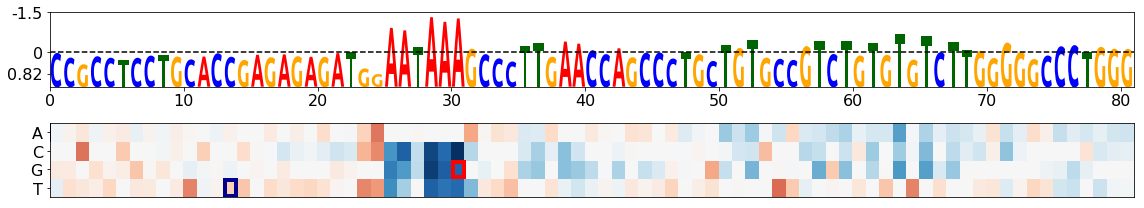

Predicted:


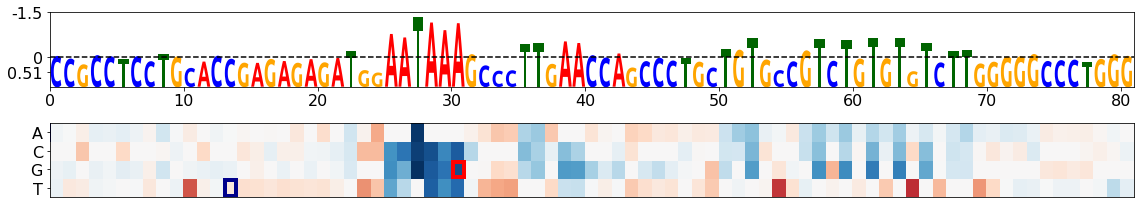

UTR = HBA2.2
# Clinvar IDs = 
c.*82G>A 1.22 (1.11)
c.*98T>C 1.89 (1.2)
c.*103G>A 1.19 (1.06)
NM_000517.4(HBA2):c.*136A>G 1.11 (1.26)
c.*104G>T 3.19 (2.09)
NM_000517.4(HBA2):c.*94A>G 76.04 (35.74)
NM_000517.4(HBA2):c.*92A>G 65.28 (28.86)
# Variants = 258 (240)
# R^2 = 0.79 (0.52)

Significance filter = p < 0.001, delta > 0.693
# Significant variants = 56 (38)
# % Significant = 21.705426356589147 (15.833333333333334)
# Significant? AUC = 0.879 (0.821)
# Direction? AUC = 1.0 (1.0)
# Direction? Accuracy = 1.0 (1.0)

Observed:


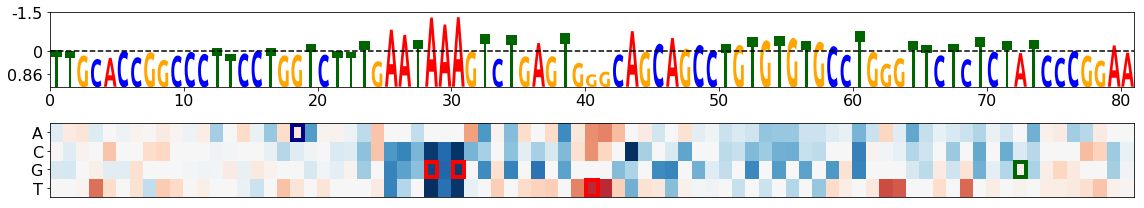

Predicted:


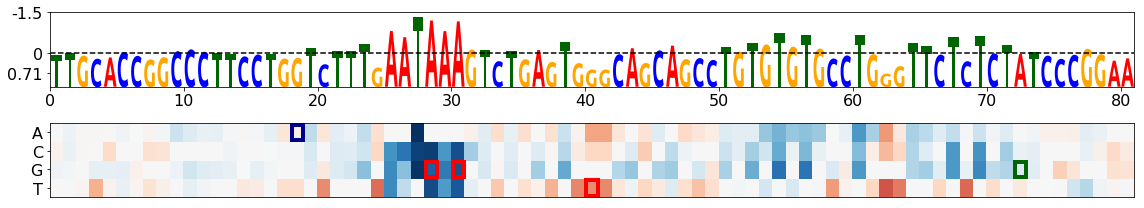

UTR = ARSA.3
# Clinvar IDs = 
c.*130C>A 1.32 (1.18)
c.*125C>G 1.07 (1.14)
c.*103C>T 1.43 (1.03)
MANUAL_ARSA_Meta_Leuko 3.1 (1.59)
# Variants = 263 (245)
# R^2 = 0.46 (0.34)

Significance filter = p < 0.001, delta > 0.693
# Significant variants = 19 (11)
# % Significant = 7.224334600760456 (4.489795918367347)
# Significant? AUC = 0.84 (0.779)
# Direction? AUC = 0.922 (1.0)
# Direction? Accuracy = 0.947 (1.0)

Observed:


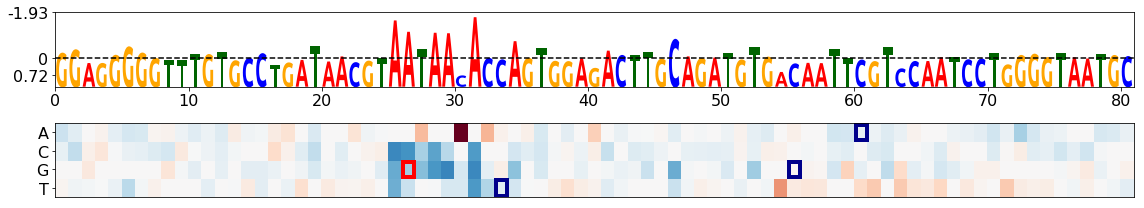

Predicted:


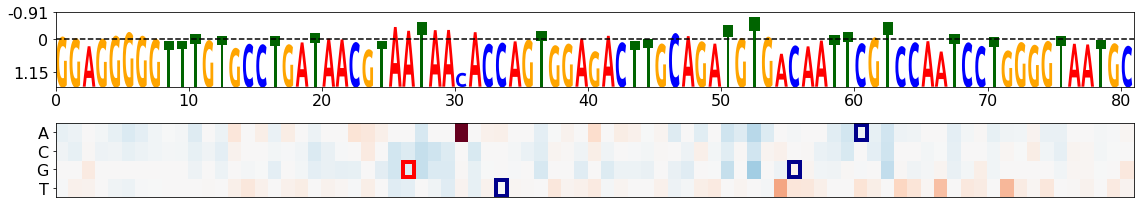

UTR = HBB.1
# Clinvar IDs = 
NM_000518.4(HBB):c.*91G>A 1.13 (1.03)
NM_000518.4(HBB):c.*96T>C 1.45 (1.19)
NM_000518.4(HBB):c.*110_*114delTAAAA 236.35 (36.09)
NM_000518.4(HBB):c.*110T>C 76.82 (30.09)
c.*129T>C 1.15 (1.03)
c.*132C>A 1.05 (1.46)
c.*132C>T 1.81 (1.26)
c.*118A>G 1.24 (1.04)
NM_000518.4(HBB):c.*113A>G 58.53 (20.64)
NM_000518.4(HBB):c.*112A>G 68.25 (14.23)
NM_000518.4(HBB):c.*111A>G 37.73 (18.62)
# Variants = 255 (237)
# R^2 = 0.92 (0.56)

Significance filter = p < 0.001, delta > 0.693
# Significant variants = 34 (17)
# % Significant = 13.333333333333334 (7.172995780590718)
# Significant? AUC = 0.95 (0.901)
# Direction? AUC = 1.0 (1.0)
# Direction? Accuracy = 1.0 (1.0)

Observed:


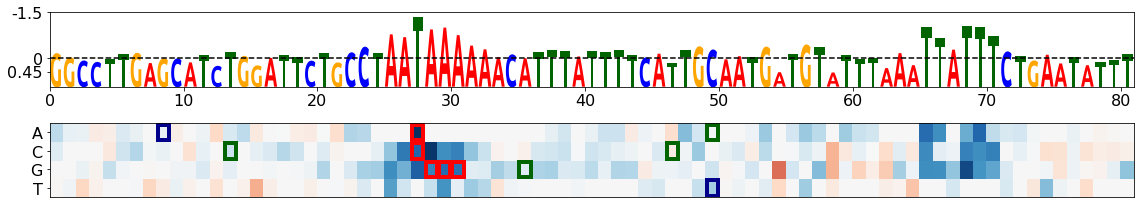

Predicted:


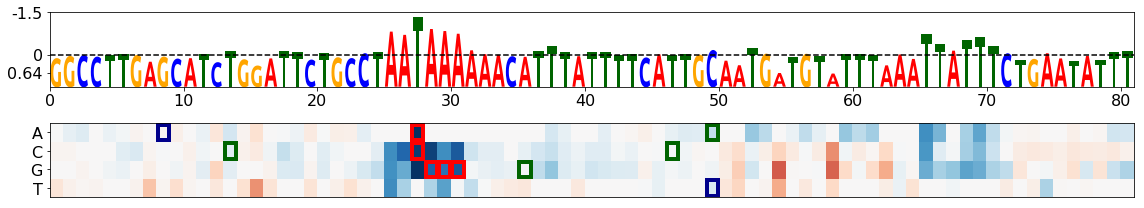

UTR = FOXC1.2
# Clinvar IDs = 
NM_001453.2(FOXC1):c.*734A>T 2.46 (2.73)
# Variants = 258 (240)
# R^2 = 0.85 (0.4)

Significance filter = p < 0.001, delta > 0.693
# Significant variants = 33 (15)
# % Significant = 12.790697674418604 (6.25)
# Significant? AUC = 0.96 (0.912)
# Direction? AUC = 0.989 (0.972)
# Direction? Accuracy = 0.97 (0.933)

Observed:


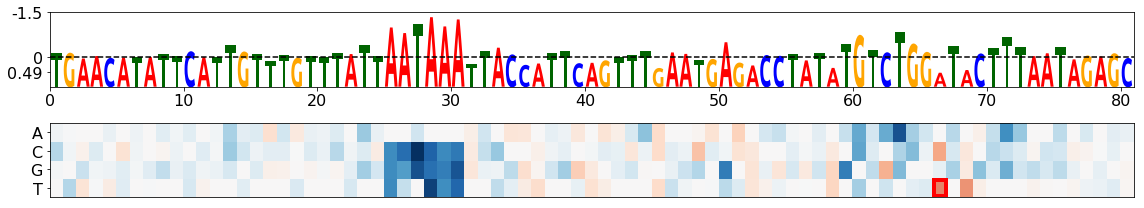

Predicted:


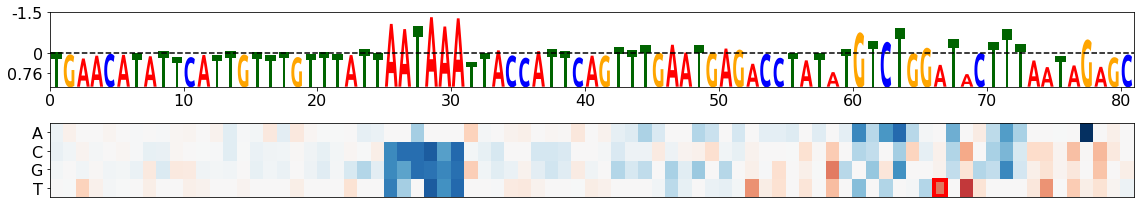

UTR = BMP1.3
# Clinvar IDs = 
NM_001199.3(BMP1):c.*241T>C 1.51 (4.12)
# Variants = 258 (240)
# R^2 = 0.46 (0.14)

Significance filter = p < 0.001, delta > 0.693
# Significant variants = 23 (13)
# % Significant = 8.914728682170542 (5.416666666666667)
# Significant? AUC = 0.688 (0.477)
# Direction? AUC = 0.962 (0.773)
# Direction? Accuracy = 0.826 (0.692)

Observed:


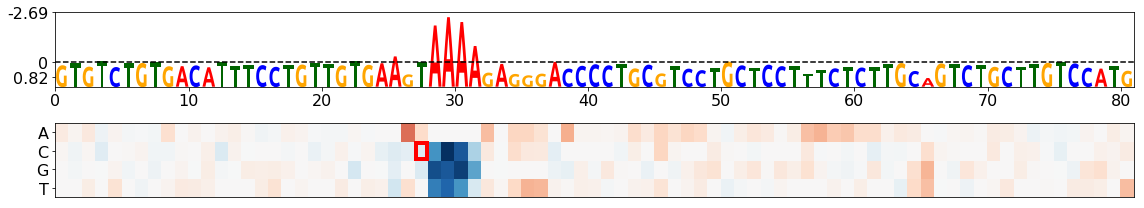

Predicted:


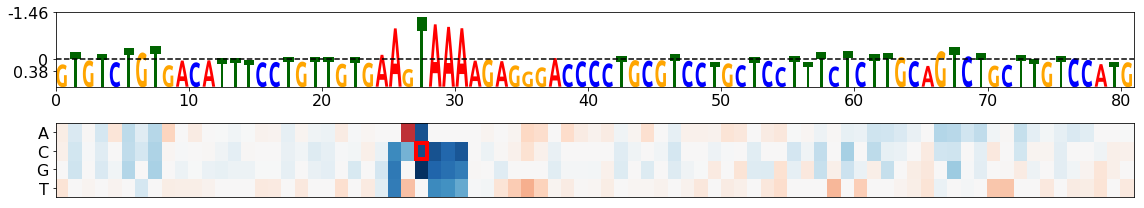

UTR = BRCA1.1
# Clinvar IDs = 
NM_007294.3(BRCA1):c.*1327G>A 1.0 (1.38)
NM_007294.3(BRCA1):c.*1332G>A 1.18 (1.58)
c.*1363A>T 73.27 (16.22)
NM_007294.3(BRCA1):c.*1323A>G 1.31 (1.1)
# Variants = 272 (254)
# R^2 = 0.88 (0.57)

Significance filter = p < 0.001, delta > 0.693
# Significant variants = 44 (26)
# % Significant = 16.176470588235293 (10.236220472440944)
# Significant? AUC = 0.928 (0.878)
# Direction? AUC = 1.0 (1.0)
# Direction? Accuracy = 1.0 (1.0)

Observed:


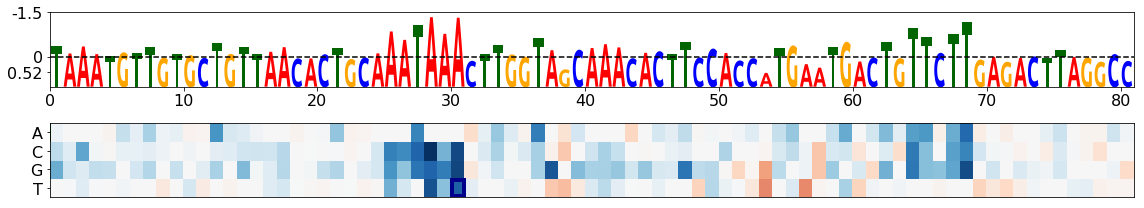

Predicted:


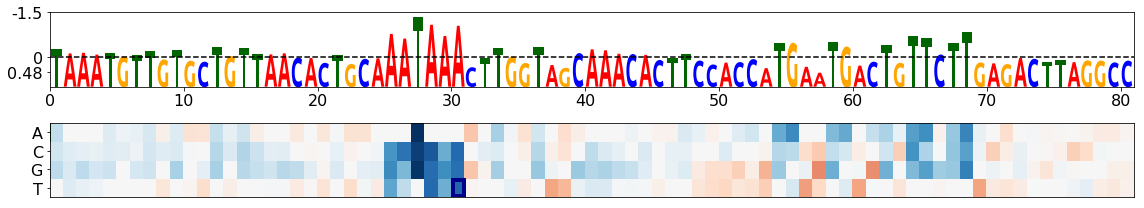

UTR = BRCA2.1
# Clinvar IDs = 
# Variants = 262 (244)
# R^2 = 0.9 (0.41)

Significance filter = p < 0.001, delta > 0.693
# Significant variants = 19 (1)
# % Significant = 7.251908396946565 (0.4098360655737705)
# Significant? AUC = 0.973 (0.494)
# Direction? AUC = 1.0 (nan)
# Direction? Accuracy = 1.0 (1.0)

Observed:


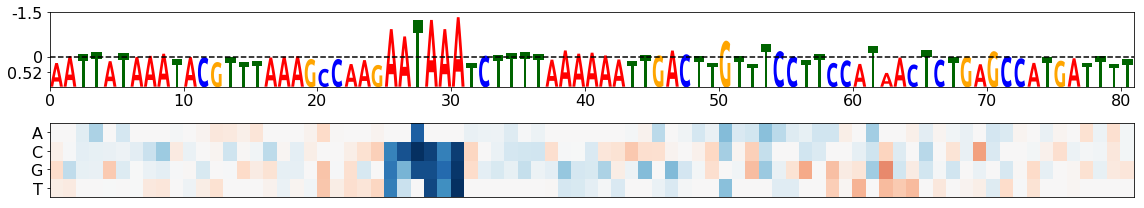

Predicted:


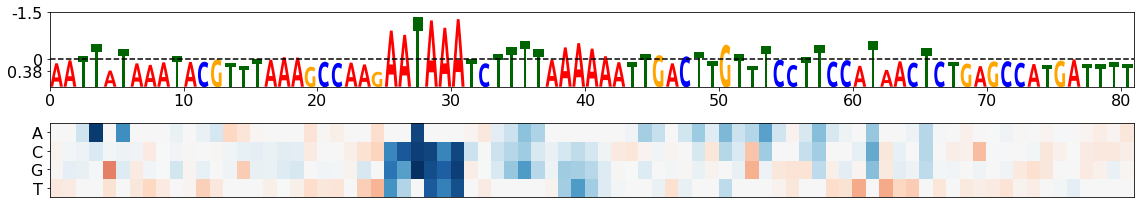

UTR = PTEN.13
# Clinvar IDs = 
# Variants = 265 (247)
# R^2 = 0.89 (0.57)

Significance filter = p < 0.001, delta > 0.693
# Significant variants = 23 (5)
# % Significant = 8.679245283018869 (2.0242914979757085)
# Significant? AUC = 0.994 (0.975)
# Direction? AUC = 1.0 (1.0)
# Direction? Accuracy = 1.0 (1.0)

Observed:


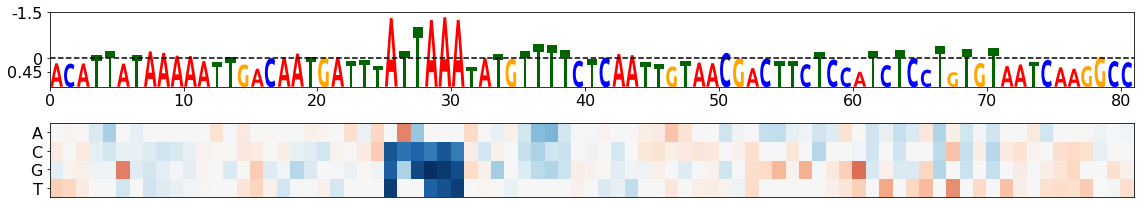

Predicted:


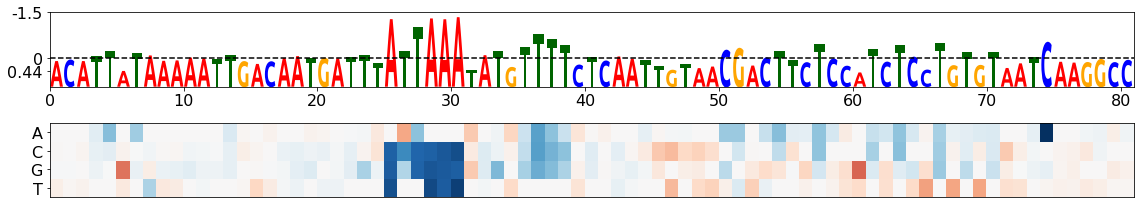

UTR = PTEN.15
# Clinvar IDs = 
c.*282G>A 1.06 (1.28)
# Variants = 266 (248)
# R^2 = 0.84 (0.2)

Significance filter = p < 0.001, delta > 0.693
# Significant variants = 29 (12)
# % Significant = 10.902255639097744 (4.838709677419355)
# Significant? AUC = 0.866 (0.679)
# Direction? AUC = 1.0 (1.0)
# Direction? Accuracy = 0.897 (0.75)

Observed:


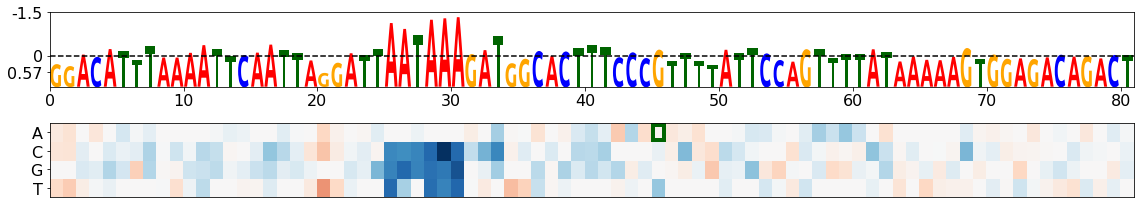

Predicted:


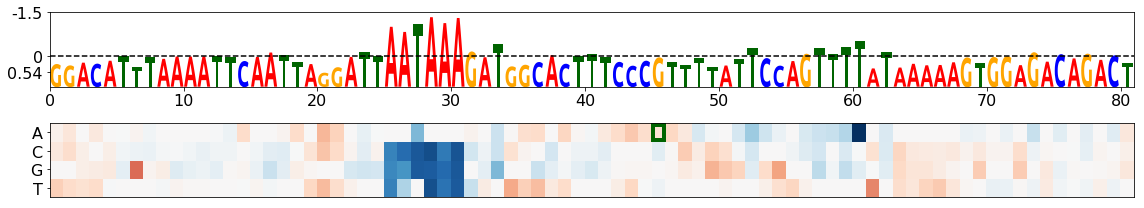

UTR = PTEN.16
# Clinvar IDs = 
c.*65T>C 1.07 (1.0)
c.*74T>C 1.13 (1.1)
c.*78T>G 1.22 (1.67)
# Variants = 260 (242)
# R^2 = 0.6 (0.8)

Significance filter = p < 0.001, delta > 0.693
# Significant variants = 26 (24)
# % Significant = 10.0 (9.917355371900827)
# Significant? AUC = 0.923 (0.933)
# Direction? AUC = 1.0 (1.0)
# Direction? Accuracy = 0.923 (0.917)

Observed:


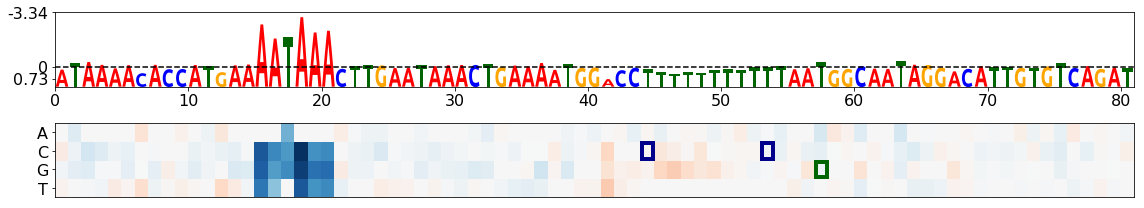

Predicted:


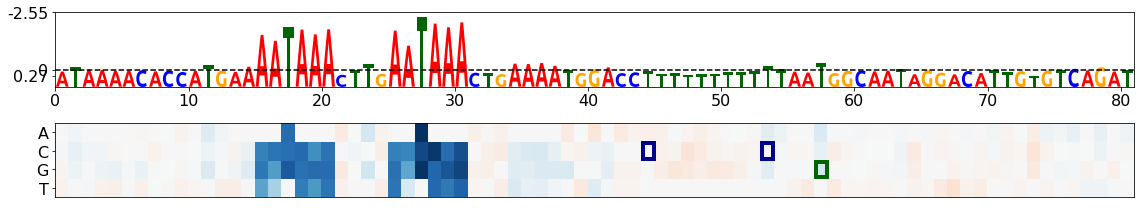

UTR = PTEN.8
# Clinvar IDs = 
# Variants = 265 (247)
# R^2 = 0.52 (0.47)

Significance filter = p < 0.001, delta > 0.693
# Significant variants = 71 (56)
# % Significant = 26.79245283018868 (22.672064777327936)
# Significant? AUC = 0.787 (0.752)
# Direction? AUC = 0.977 (0.979)
# Direction? Accuracy = 0.887 (0.857)

Observed:


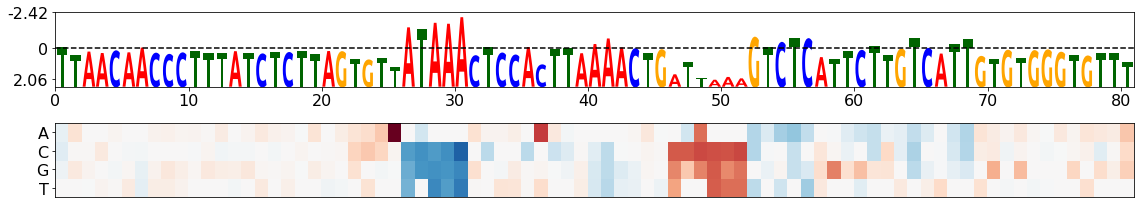

Predicted:


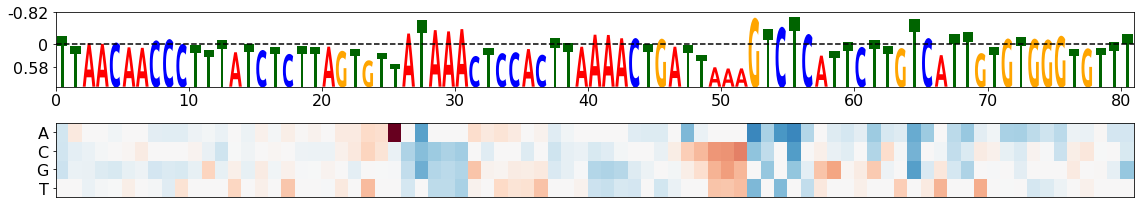

UTR = TPMT.1
# Clinvar IDs = 
NM_000367.4(TPMT):c.*2340T>C 1.37 (1.51)
# Variants = 266 (248)
# R^2 = 0.71 (0.51)

Significance filter = p < 0.001, delta > 0.693
# Significant variants = 39 (22)
# % Significant = 14.661654135338345 (8.870967741935484)
# Significant? AUC = 0.933 (0.889)
# Direction? AUC = 1.0 (1.0)
# Direction? Accuracy = 1.0 (1.0)

Observed:


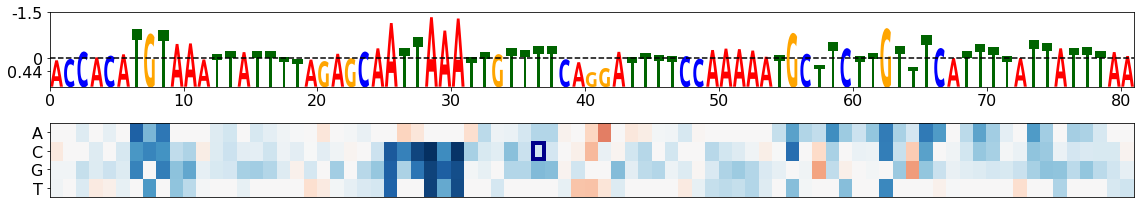

Predicted:


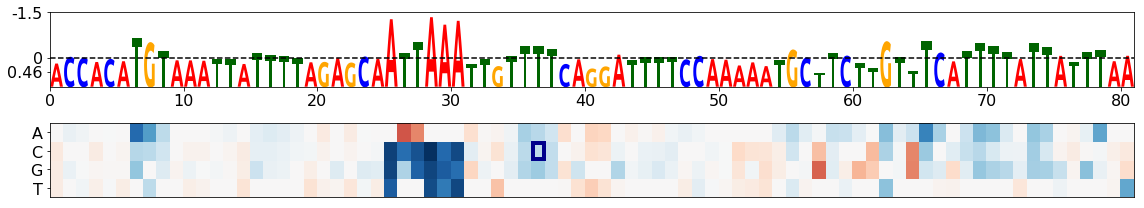

UTR = TPMT.3
# Clinvar IDs = 
# Variants = 264 (246)
# R^2 = 0.91 (0.29)

Significance filter = p < 0.001, delta > 0.693
# Significant variants = 26 (8)
# % Significant = 9.848484848484848 (3.252032520325203)
# Significant? AUC = 0.914 (0.721)
# Direction? AUC = 1.0 (1.0)
# Direction? Accuracy = 0.962 (0.875)

Observed:


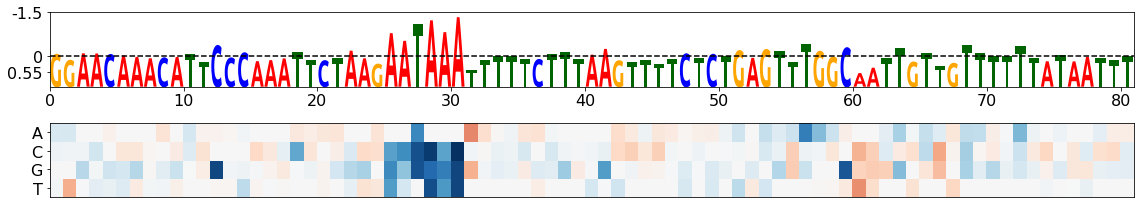

Predicted:


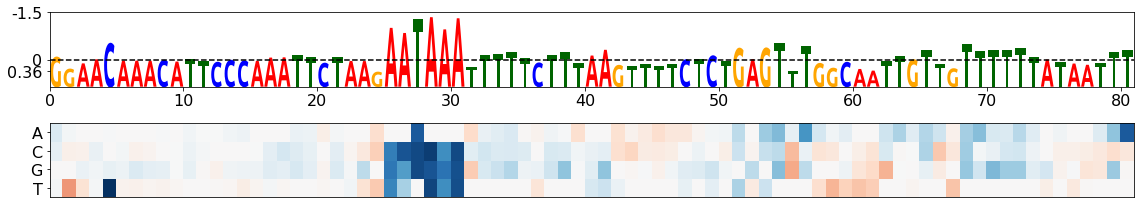

In [4]:
#Disease-implicated PASs
gene_names = [
    'F2.1',
    'FOXP3.1',
    'TP53.3',
    'INS.1',
    'HBA2.2',
    'ARSA.3',
    'HBB.1',
    'FOXC1.2',
    'BMP1.3',
    'BRCA1.1',
    'BRCA2.1',
    'PTEN.13',
    'PTEN.15',
    'PTEN.16',
    'PTEN.8',
    'TPMT.1',
    'TPMT.3'
]

delta_logodds_pred_bias = 0.0

configs = [
    [25, 106, (16,3)]
]

save_figs = False

gene_exceptions = ['FOXP3.1']

valid_wt_seqs = human_variant_df.groupby('wt_seq').agg({'delta_logodds_true' : 'count'}).reset_index().query("delta_logodds_true > 50")['wt_seq'].unique()
df_to_use = human_variant_df.loc[human_variant_df.wt_seq.isin(valid_wt_seqs) | human_variant_df.gene.isin(gene_exceptions)]

df_to_use = df_to_use.copy().set_index('master_seq')
df_to_use['snv_pos'] = pd.to_numeric(df_to_use['snv_pos'], downcast='integer')
df_to_use['delta_logodds_pred'] = df_to_use['mean_delta_logodds_pred']

p_thresh = 0.001
delta_thresh = 0.693

fixed_scale=True

for gene_name in gene_names :
    for seq_start, seq_end, figsize in configs :
        
        #Calculate per-utr statistics

        df_gene = df_to_use.query("gene == '" + gene_name + "'")
        df_gene_nopas = df_to_use.query("gene == '" + gene_name + "' and (snv_pos < 50 or snv_pos > 55)")

        df_gene_signi = df_gene.query("delta_p_val < " + str(p_thresh) + " and (delta_logodds_true < -" + str(delta_thresh) + " or delta_logodds_true > " + str(delta_thresh) + ")")
        df_gene_signi_nopas = df_gene_nopas.query("delta_p_val < " + str(p_thresh) + " and (delta_logodds_true < -" + str(delta_thresh) + " or delta_logodds_true > " + str(delta_thresh) + ")")

        n_variants = len(df_gene)
        n_variants_nopas = len(df_gene_nopas)

        n_variants_signi = len(df_gene_signi)
        n_variants_signi_nopas = len(df_gene_signi_nopas)

        r_val, _ = pearsonr(df_gene['delta_logodds_pred'], df_gene['delta_logodds_true'])
        r2 = round(r_val * r_val, 2)
        r_val_nopas, _ = pearsonr(df_gene_nopas['delta_logodds_pred'], df_gene_nopas['delta_logodds_true'])
        r2_nopas = round(r_val_nopas * r_val_nopas, 2)

        significant_labels = np.zeros(len(df_gene))
        significant_labels[(df_gene['delta_p_val'] < p_thresh) & (np.abs(df_gene['delta_logodds_true']) > delta_thresh)] = 1
        significant_auc = np.nan
        if np.sum(significant_labels) != 0 and np.sum(significant_labels) != len(significant_labels) :
            significant_auc = round(roc_auc_score(significant_labels, np.ravel(np.abs(df_gene['delta_logodds_pred']))), 3)

        direction_acc = np.nan
        if len(df_gene_signi) > 0 :
            direction_acc = float(len(np.nonzero(np.sign(np.ravel(df_gene_signi['delta_logodds_pred'] + delta_logodds_pred_bias)) == np.sign(np.ravel(df_gene_signi['delta_logodds_true'])))[0]))
            direction_acc /= float(len(df_gene_signi))
            direction_acc = round(direction_acc, 3)
        
        significant_labels_nopas = np.zeros(len(df_gene_nopas))
        significant_labels_nopas[(df_gene_nopas['delta_p_val'] < p_thresh) & (np.abs(df_gene_nopas['delta_logodds_true']) > delta_thresh)] = 1
        significant_auc_nopas = np.nan
        if np.sum(significant_labels_nopas) != 0 and np.sum(significant_labels_nopas) != len(significant_labels_nopas) :
            significant_auc_nopas = round(roc_auc_score(significant_labels_nopas, np.ravel(np.abs(df_gene_nopas['delta_logodds_pred']))), 3)

        direction_acc_nopas = np.nan
        if len(df_gene_signi_nopas) > 0 :
            direction_acc_nopas = float(len(np.nonzero(np.sign(np.ravel(df_gene_signi_nopas['delta_logodds_pred'] + delta_logodds_pred_bias)) == np.sign(np.ravel(df_gene_signi_nopas['delta_logodds_true'])))[0]))
            direction_acc_nopas /= float(len(df_gene_signi_nopas))
            direction_acc_nopas = round(direction_acc_nopas, 3)
        
        direction_labels = np.zeros(len(df_gene_signi))
        direction_labels[df_gene_signi['delta_logodds_true'] > 0.0] = 1
        direction_auc = np.nan
        if np.sum(direction_labels) != 0 and np.sum(direction_labels) != len(direction_labels) :
            direction_auc = round(roc_auc_score(direction_labels, np.ravel(df_gene_signi['delta_logodds_pred'])), 3)

        direction_labels_nopas = np.zeros(len(df_gene_signi_nopas))
        direction_labels_nopas[df_gene_signi_nopas['delta_logodds_true'] > 0.0] = 1
        direction_auc_nopas = np.nan
        if np.sum(direction_labels_nopas) != 0 and np.sum(direction_labels_nopas) != len(direction_labels_nopas) :
            direction_auc_nopas = round(roc_auc_score(direction_labels_nopas, np.ravel(df_gene_signi_nopas['delta_logodds_pred'])), 3)

        print("UTR = " + gene_name)
        
        clinvar_ids = 'N/A'
        clinvar_id_list = []
        if not (len(df_gene['clinvar_id']) == 1 and df_gene['clinvar_id'].unique()[0] == 'Missing') :
            clinvar_ids = ''
            for clinvar_id in list(df_gene['clinvar_id'].unique()) :
                if clinvar_id != 'Missing' :
                    clinvar_id_list.append(clinvar_id)
                    snv_pos = df_gene.query("clinvar_id == '" + clinvar_id + "'")['snv_pos'].values[0]
                    snv_nt = df_gene.query("clinvar_id == '" + clinvar_id + "'").index.values[0][int(snv_pos)]
                    clinvar_ids += clinvar_id + ': ' + str(int(snv_pos))
                    clinvar_ids += ' (' + snv_nt + ')\n'

        #print("# Clinvar IDs = " + clinvar_ids)
        print("# Clinvar IDs = ")
        for clinvar_id in clinvar_id_list :
            if len(df_to_use.query("clinvar_id == '" + clinvar_id + "'")) > 0 :
                true_fold = np.exp(list(df_to_use.query("clinvar_id == '" + clinvar_id + "'")['delta_logodds_true'].values)[0])
                pred_fold = np.exp(list(df_to_use.query("clinvar_id == '" + clinvar_id + "'")['delta_logodds_pred'].values)[0])
                
                if true_fold < 1.0 :
                    true_fold = 1.0 / true_fold
                if pred_fold < 1.0 :
                    pred_fold = 1.0 / pred_fold
                
                print(clinvar_id + " " + str(round(true_fold, 2)) + " (" + str(round(pred_fold, 2)) + ")")
        
        print("# Variants = " + str(n_variants) + " (" + str(n_variants_nopas) + ")")
        print("# R^2 = " + str(r2) + " (" + str(r2_nopas) + ")")
        print("")

        print("Significance filter = p < " + str(p_thresh) + ", delta > " + str(delta_thresh))
        print("# Significant variants = " + str(n_variants_signi) + " (" + str(n_variants_signi_nopas) + ")")
        print("# % Significant = " + str(100. * n_variants_signi / n_variants) + " (" + str(100. * n_variants_signi_nopas / n_variants_nopas) + ")")
        print("# Significant? AUC = " + str(significant_auc) + " (" + str(significant_auc_nopas) + ")")
        print("# Direction? AUC = " + str(direction_auc) + " (" + str(direction_auc_nopas) + ")")
        print("# Direction? Accuracy = " + str(direction_acc) + " (" + str(direction_acc_nopas) + ")")
        print("")

        pas = df_gene['wt_seq'].values[0][50:56]
        cano_pas = True if pas in ['AATAAA', 'ATTAAA'] else False
        
        cano_pas_downscaling = 0.5
        cano_pas_mode = 'frac'
        if fixed_scale :
            cano_pas_downscaling = -1.5
            cano_pas_mode = 'value'
        
        print('Observed:')

        pas_max_val_obs = mut_map_v2(
                df_to_use,
                gene_name,
                experiment=None,
                mode='true',
                figsize=figsize,
                mark_pathogenic=True,
                mark_benign=True,
                mark_undetermined=True,
                seq_trim_start=seq_start, seq_trim_end=seq_end,
                plot_start=0, plot_end=seq_end - seq_start,
                pas_downscaling=cano_pas_downscaling if cano_pas else 1.0,
                pas_downscale_mode=cano_pas_mode if cano_pas else 'frac',
                fig_name=(gene_name.replace('.', '_') + '_Mutmap_Observed_' + str(seq_start) + '_' + str(seq_end)) if save_figs else None,
                fig_dpi=150
        )

        print('Predicted:')
        
        mut_map_v2(
                df_to_use,
                gene_name,
                experiment=None,
                mode='pred',
                figsize=figsize,
                mark_pathogenic=True,
                mark_benign=True,
                mark_undetermined=True,
                seq_trim_start=seq_start, seq_trim_end=seq_end,
                plot_start=0, plot_end=seq_end - seq_start,
                #pas_downscaling=0.5,
                pas_downscaling=pas_max_val_obs if cano_pas else 1.0,
                pas_downscale_mode='value'if cano_pas else 'frac',
                fig_name=(gene_name.replace('.', '_') + '_Mutmap_Predicted_' + str(seq_start) + '_' + str(seq_end)) if save_figs else None,
                fig_dpi=150
        )

<h2>Cleavage Alteration (Measured and Predicted) of F2 97G>A Variant</h2>

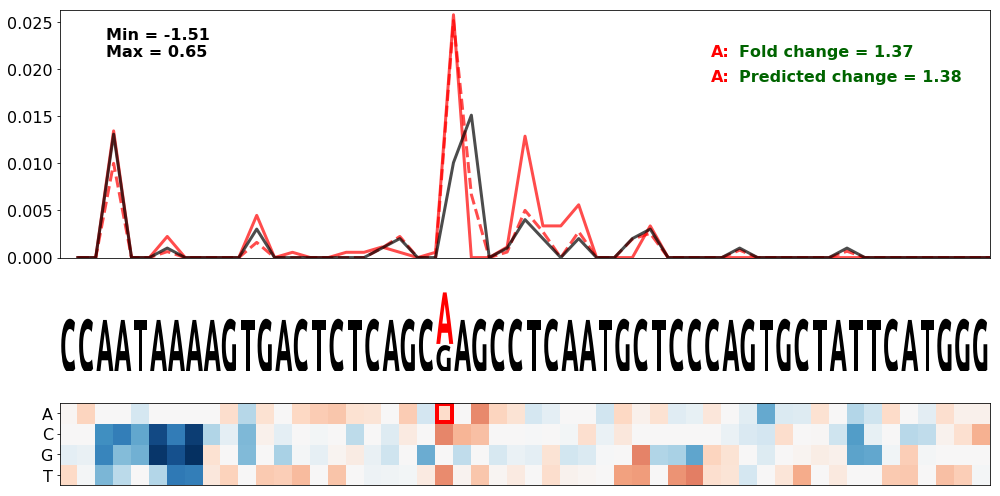

In [5]:
gene_name = 'F2.1'

snvs = [(69, 'A', 'red')]

seq_start = 48
seq_end = 100

save_figs = False

df_gene = human_variant_df.query("gene == '" + str(gene_name) + "'").copy().set_index('master_seq')
df_gene['delta_logodds_pred'] = df_gene['mean_delta_logodds_pred']

mut_map_with_cuts(
        df_gene,
        gene_name,
        snvs,
        mode='true',
        column_suffix='',
        figsize=(14, 7),
        height_ratios=[6, 2, 2],
        bg_alpha=0.999,
        plot_simple_mutmap=True,
        annotate_folds=True,
        plot_true_cuts=True,
        plot_pred_cuts=True,
        scale_pred_cuts=True,
        #fold_change_from_cut_range=[65, 80],
        ref_var_scales=[0.5, 1.0],
        border_eta = 0.06,
        seq_trim_start=seq_start, seq_trim_end=seq_end,
        plot_start=0, plot_end=seq_end-seq_start,
        plot_as_bars=False,
        pas_downscaling=0.5,
        fig_name=(gene_name.replace('.', '_') + '_Cut_Both_Pathogenic') if save_figs else None,
        fig_dpi=150
)